In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
# plt.rcParams["figure.figsize"] = (8,8)
# plt.rcParams.update(
#     {'legend.fontsize': 'xx-large',
#     'axes.labelsize': '24',
#     'axes.titlesize':'xx-large',
#     'xtick.labelsize':'xx-large',
#     'ytick.labelsize':'xx-large',
#     'figure.autolayout': True,
#     'text.usetex'      : True})

# plt.rcParams['font.family'] 	= 'serif'
# plt.rcParams['font.serif'] 		= 'Ubuntu'
# plt.rcParams['font.monospace'] 	= 'Ubuntu Mono'
# plt.rcParams['font.size'] 		= 30
# plt.rcParams['axes.labelsize'] 	= 30
# plt.rcParams['axes.titlesize'] 	= 30
# plt.rcParams['xtick.labelsize'] = 20
# plt.rcParams['ytick.labelsize'] = 20
# plt.rcParams['legend.fontsize'] = 30
# plt.rcParams['figure.titlesize']= 30

def get_sigmaset(longer=False):
    '''
    longer: adds 4 more points in the range 30-70
    '''
    a = np.linspace(0,.25,num=6)
    a[0] = 0.5*a[1]
    b = np.linspace(.5,5,num=7)
    c = np.linspace(9,30,num=7)
    if longer==False:
        return np.hstack((np.hstack((a,b)),c))
    else:
        d = np.linspace(40,70,num=4)
        return np.hstack((np.hstack((a,b)),np.hstack((c,d))))

In [2]:
def get_plot(fname):
    results = pickle.load(open(fname+'.pkl','rb'))
    sigmaset=get_sigmaset(len(results)==24)
    results_temp = {x['sigma']:x for x in results}
    revx_vs_sigma = np.zeros((3,len(sigmaset)))
    for idxi,sigtemp in enumerate(sigmaset):
        revx_vs_sigma[0,idxi] = results_temp[sigtemp]['no']
        revx_vs_sigma[1,idxi] = results_temp[sigtemp]['full']
        revx_vs_sigma[2,idxi] = results_temp[sigtemp]['2stg']

    fig, ax = plt.subplots(1, 1)
    ax.plot(sigmaset,revx_vs_sigma[0],color= 'red',lw=2.1,label='Blind')
    ax.plot(sigmaset,revx_vs_sigma[1],'-.', color= 'b',lw=2.2,label='Informed')
    ax.plot(sigmaset,revx_vs_sigma[2],'--',color= 'black',lw=2.1,label='Two-stage')
    ax.set_xlabel('$\sigma$')
    ax.set_ylabel('profit')
    plt.legend(loc='best')
    plt.savefig(fname+'.png')
    plt.show()

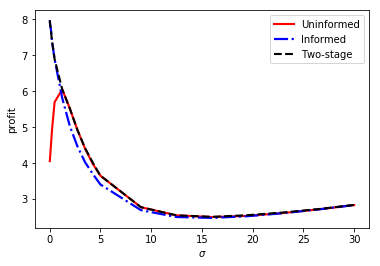

In [3]:
fname = 'results_muz10_sigmaz1_cost0_psetres200_sigmasetres20_ncurves3'
get_plot(fname)

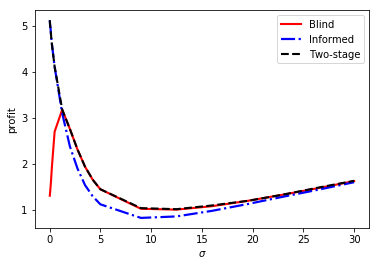

In [3]:
fname = 'results_muz10_sigmaz1_cost3_psetres200_sigmasetres20_ncurves3'
get_plot(fname)

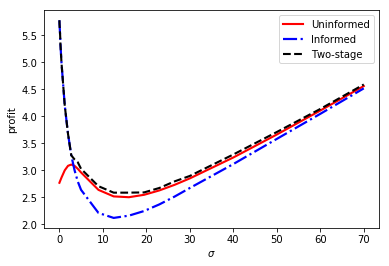

In [5]:
fname = 'results_muz10_sigmaz4_cost0_psetres200_sigmasetres24_ncurves3'
get_plot(fname)

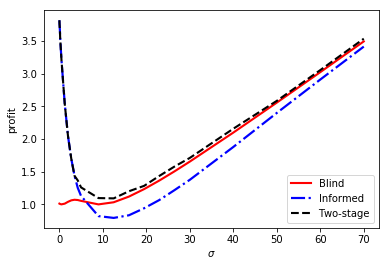

In [4]:
fname = 'results_muz10_sigmaz4_cost3_psetres200_sigmasetres24_ncurves3'
get_plot(fname)